In [2]:
# !pip install wfdb

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)

import wfdb
import glob
import os

# Context
Cardiovascular Disease is the main cause of humain death, responsible for 31% of the world cide deaths in 2016. The major cause of the cardiac deaths is cardiac arrhythmia. The best equipment for monitoring and identifying arrhythmia is an electrocardiogram(ECG).

By recording ECG, analysing these features and classifying signals we can make assessments about the healthy state of the heart, diagnose certain diseases of the heart and predict whether a subject will go on to develop certain diseases.

ECG (Electrocardiogram) is non-stationary physiolocial signal representing electrical activity of heart. In other words, ECG is a periodic waveform that describes the action of heart as it moves.


In this project, we will classify ECG signals to make assessments about the health state of the heart. For this purpose, we use ensemble of three PhysioNet databases: MIT-BIH Arrhythmia Database, MIT-BIH Normal Sinus Rhythm Database, and The BIDMC Congestive Heart Failure Database.

- MIT-BIH Arrhythmia database (ARR-Database) consists of 48 half-hour ECG recording from people with cardiac arrhythmia problem. Each record was sampled at 360 hertz and contains two chanels. source [here](https://www.physionet.org/content/mitdb/1.0.0/ ).

- MIT-BIH Normal Sinus Rhythm Database (NSR-Database) consists of 18 long-tern ECG recording from people with normal sinus rhythms. Records in this databased were sampled at 128 hertz.
source [here](https://www.physionet.org/content/nsrdb/1.0.0/).

- BIDMC Congestive Heart Failure Database (CHF-Database) consists of 15 long-tern ECG recording from people with congestive heart failure. Records in this databased were sampled at 250 hertz. [source](https://www.physionet.org/content/chfdb/1.0.0/)


If you want to waves : https://www.physionet.org/lightwave/?db=mitdb/1.0.0


# List of exercises

# Ex1: Plot signals and show data

The files named "101.dat" and "101.hea" which are an human electrocardiogram (ECG) record of one person with cardiac arrhythmia (ARR) problem.

1.1. Write a function named "load_record_using_wfdb(filename, start, end, channel, directory)" which reads a channel of a record from "start" to "end". Note that each record has two channels. This function returns numpy array which contains data of the signal.  
To get the data it is easier if you stream the data from physionet.  

Specify the parameter "start" = 0.


Specify the parameter "end" = 2000


1.2 By using matplotlib package, plot the signal. The signal is periodic ? Its shape is the same of a sinusoidal wave ?

In [4]:
import numpy as np

def load_signal_using_wfdb(file, start, end, channel, pn_dir):
    """
    file: name of record
    start: int
    end:int
    channel: 0 or 1
    """
    record = wfdb.rdrecord(file, sampfrom = start, sampto = end, channels=[channel], pn_dir=pn_dir)
    data = record.p_signal.reshape(-1)
    return data


In [5]:
signals = load_signal_using_wfdb('101', 0, 2000, 0, 'mitdb/')
signals

array([-0.345, -0.345, -0.345, ..., -0.43 , -0.45 , -0.455])

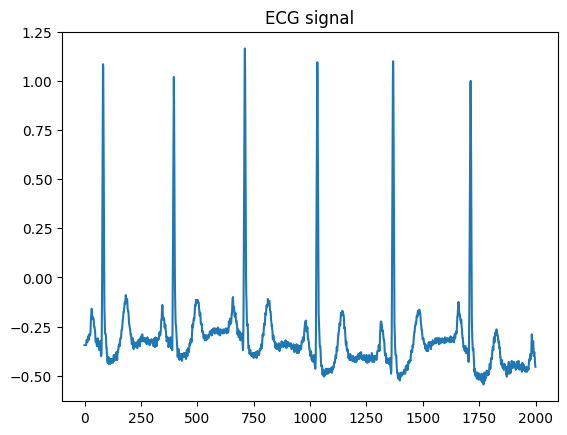

In [6]:
# plot the signal channel 0
plt.plot(signals)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('ECG signal')
plt.show()

# Ex2: Cut up signal
2.1.  Write a function named "split_vecto_into_chunk" that splits an array vector into chunks of size N. It takes as arguments a vector and size of chunk and returns a list of its chunks.

2.2.  ECG signals record frequently for a long period of time at different sampling rates.

Write function named "cut_signal_into_segments(signal, sampling_rate, duration_segment)" which allows to cut up a signal into shorter segments of a specified duration. This function returns a list of segments.

Note that:
        number_of_samples = sampling_rate*duration.



[Note] For sampling rate put those indicate before for each record.

[Note] In addition to test your function you can try to print the original signal and the chunks in the same cell or plot

## 2.1.

In [7]:
def split_vector_into_chunk(vector, size):
    return [vector[i:i+size] for i in range(0, len(vector), size)]

### 2.1. Test (check function)

In [8]:
import numpy as np
list_vectors = [np.array([1,2]), np.array([1,2,3,4,5,6,7,8,9,10, 11, 12, 13]), np.random.rand(5)]

for vector in list_vectors:
    result = split_vector_into_chunk(vector, 2)
    print(result)

[array([1, 2])]
[array([1, 2]), array([3, 4]), array([5, 6]), array([7, 8]), array([ 9, 10]), array([11, 12]), array([13])]
[array([0.84146705, 0.95709671]), array([0.98796396, 0.19166862]), array([0.6466885])]


## 2.2.

In [9]:
# number_of_samples = sampling_rate*duration.

def cut_signal_into_segments(signal, sampling_rate, duration_segment):
    number_of_samples = int(sampling_rate * duration_segment)
    return split_vector_into_chunk(signal, number_of_samples)

## 2.2. Test

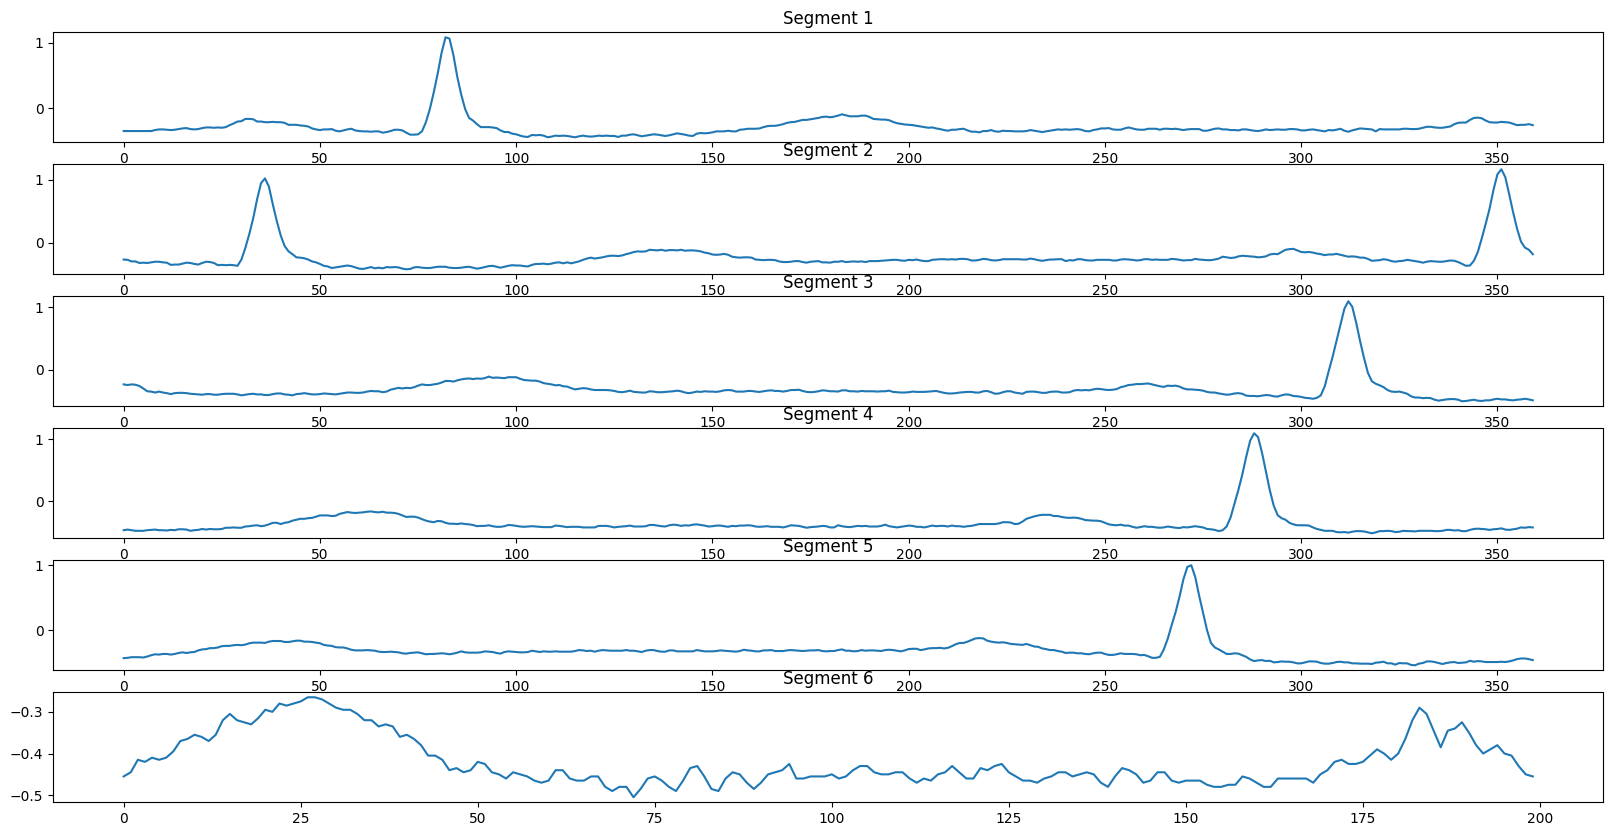

In [45]:
# The signal loaded previously. 

segments = cut_signal_into_segments(signals, 360, 1)
    
# Plot each segment into the small subplots on the same figure.

fig, axs = plt.subplots(len(segments), 1, figsize=(20, 10))
for i, segment in enumerate(segments):
    axs[i].plot(segment)
    axs[i].set_title('Segment {}'.format(i+1))
plt.show()



    

# Ex3:  Synchronize data
These records from different database were digitized at different frequences.
We recall that ECG records of ARR-Database were sampled at 360 Hz, those of CHF Database at 250 Hz and those of NSR Database at 128Hz.

3.1. With SCIPY package, write a function named "synchronize_signal" which resamples signal at any sampling rate to a common rate (for example 128 Hz). It takes as arguments a signal and its sampling rate and new sampling rate that we want to resample.

3.2.  Plot the original and resampled signals on the same figure (using subplot of matplotlib).


## 3.1. Solution

In [11]:
from scipy.signal import resample
import numpy as np

def synchronize_signal(signal, original_sampling_rate, new_sampling_rate):
    
    # Calculate the new length of the signal
    new_length = int(len(signal) * (new_sampling_rate / original_sampling_rate))
    
    # Resample the signal
    resampled_signal = resample(signal, new_length)
    
    return resampled_signal

### 3.1. Test

In [12]:
list_signals = [np.array([0,1,2,3,4,5,6]), np.array([1,2,3]), np.array([1,2,3,4,5,6,7,8,9,10])]
for signal in list_signals:
    signal_resampled = synchronize_signal(signal, 1, 2/3)
    print(signal_resampled)

[1.        1.9234786 3.        6.0765214]
[1. 3.]
[ 2.5         2.64266616  4.02662958  6.5         6.97337042 10.35733384]


### 3.2. Test

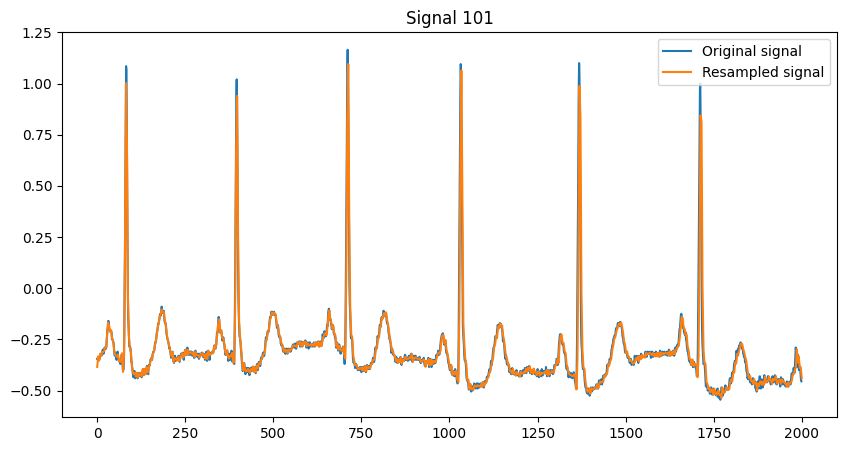

In [34]:
frequency = 360
filename = '101'

fig, ax = plt.subplots(1,figsize=(10,5))
# plot the original signal
ax.plot(signals,label=f'Original signal')

new_frequency = 128
# Synchronisation du nouveau signal à une fréquence différente
resampled_signal = synchronize_signal(signals,frequency,new_frequency)

# both signals on same phase
xnew = np.linspace(0,signals.shape[0],resampled_signal.shape[0])

# plot the resampled signal
ax.plot(xnew,resampled_signal,label=f'Resampled signal')
ax.set_title(f'Signal {filename}')

ax.legend()
plt.legend()
plt.show()


# Ex4) Remove noise
ECG signals frequently contain some noise. There are many reasons for this:
- Activity of other body muscles
- Baseline shift because of respirators
- Poor contact of electrode
- Equiment ...

It's important to remove noise from signals. The common frequencies of the important components on the ECG from 0.5Hz - 100Hz.

An array signal named "signal_arr" is loaded in the environement.


4.1.  We note that a low pass filter that allows to passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.


Using scipy.butter, design a low pass filter which filters out frequencies larger than 100Hz. Apply it to signal_arr.



4.2. Similarly, A high pass filter is used to isolate the signals which have frequencies lower than the cutoff frequency.

Design a high pass filter which filters out frequencies smaller than 0.5 Hz. Apply it to signal_arr.



4.3.  A band-pass filter can be formed by cascading a high-pass filter and a low-pass filter.

Design a band-pass filter which filters out frequencies out of range 0.5Hz - 100Hz. Apply it to signal_arr.

4.4.  Plot these signals on the same figure (using the method "matplotlib.pyplot.subplots"). Do you have any comments on the magnitude of these signals ? Did the shape of the origine signal change after passing through one of these filter ?

## Solution


In [15]:
from scipy import signal as scipy_signal
highpass = 0.1
lowpass = 100
signal_arr = load_signal_using_wfdb('101', 0, 2000, 0, 'mitdb/')

In [16]:
# low pass
a_low, b_low = scipy_signal.butter(6, lowpass, btype='lowpass', analog = True)
signal_filtered_lowpass = scipy_signal.filtfilt(b_low, a_low, signal_arr)

In [17]:
# high pass
a_high, b_high = scipy_signal.butter(6, highpass, btype='highpass', analog = True)
signal_filtered_highpass = scipy_signal.filtfilt(b_high, a_high, signal_arr)

In [18]:
# bandpass
a_band, b_band = scipy_signal.butter(6, (highpass, lowpass), btype='bandpass', analog = True)
signal_filtered_bandpass = scipy_signal.filtfilt(b_band, a_band, signal_arr)

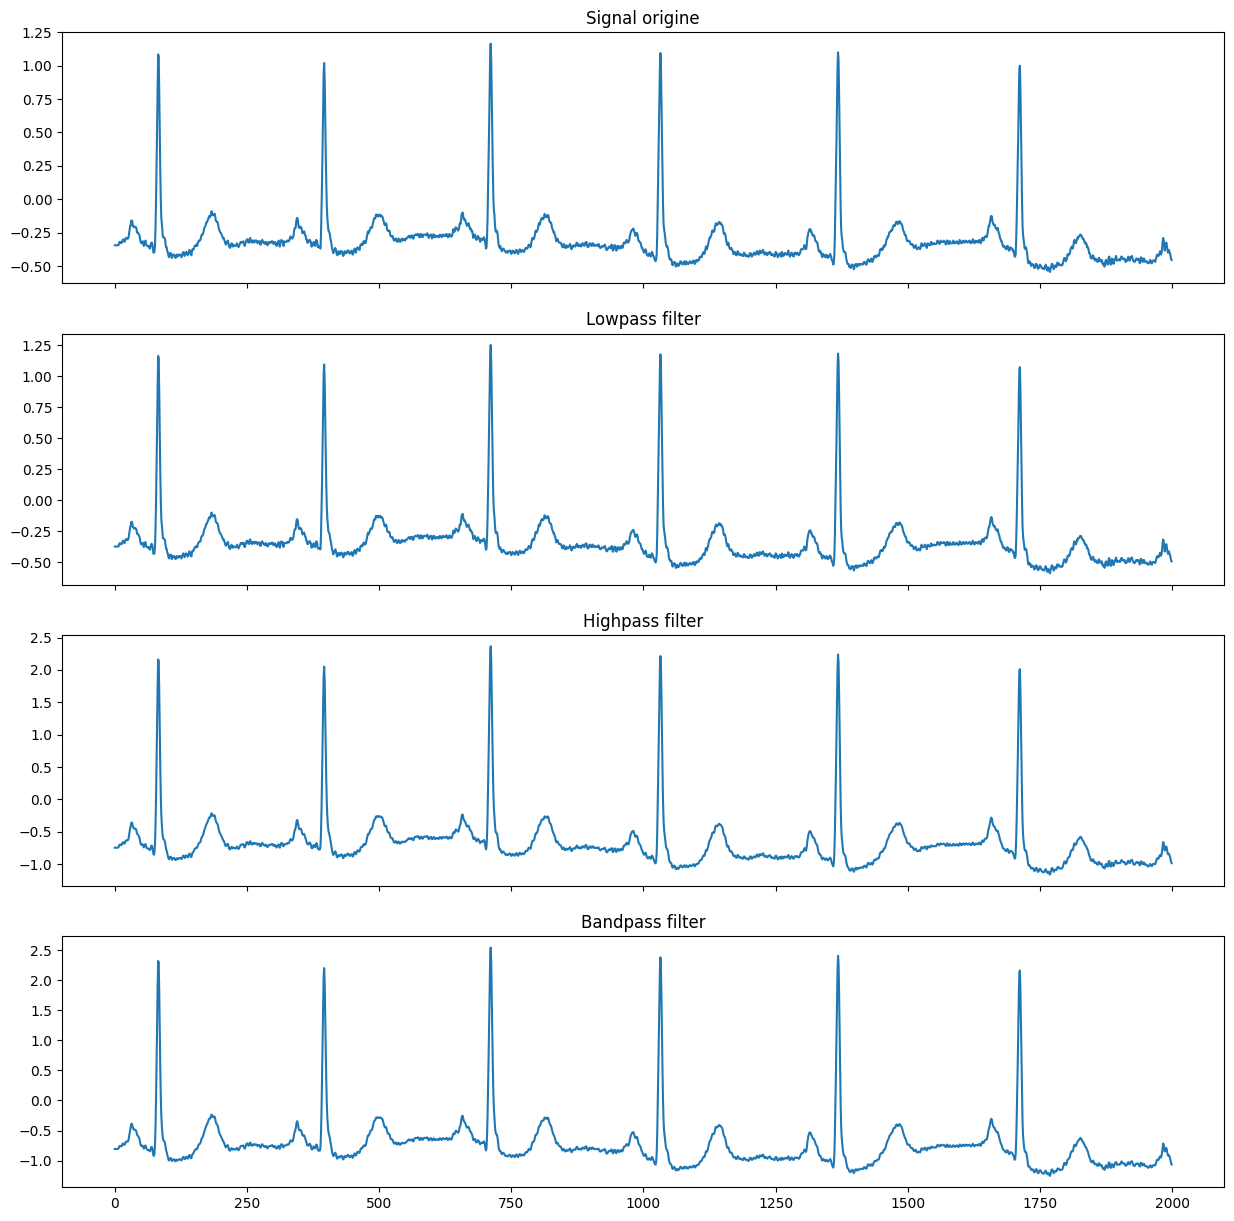

In [19]:
fig, ax = plt.subplots(4, sharex=True, figsize=(15, 15))
ax[0].plot(signal_arr)
ax[0].title.set_text("Signal origine")

ax[1].plot(signal_filtered_lowpass)
ax[1].title.set_text("Lowpass filter")

ax[2].plot(signal_filtered_highpass)
ax[2].title.set_text("Highpass filter")

ax[3].plot(signal_filtered_bandpass)
ax[3].title.set_text("Bandpass filter")

# Ex5)  Discrete Wavelet Transform (DWT)
A way of splitting a signal into several frequency sub-bands is to use Discrete Wavelet transform (DWT). The output of DWT contains two sets of coefficients: the approximation coefficients and detail coefficient.


5.1 Using package pywt in Python, decompose a ECG signal using DWT. Plot the approximation coeffs and detail coeffs on the same figure (using the method subplots of matplotlib )

Do you have comments on the magnitude of approximation coeffs and that of detail coeffs, compare them to that of origine signal ? Did you see the diffence between the origine signal and the approximation coeffs ?

5.2 We can again apply DWT on the approximation coefficients of the previous DWT to get the next level. The method pywt.wavedec() allows us to immediately calculate the coefficients of a higher level.  Using this method, calculate the coeffs of your signal until levels 5. Plot these coeffs on the same figure.


How many are there sets of the coeffs at level 5? Compare these sets of the coeffs to the origine signal. Which one approximates the origine signal ? What is the difference between the 6th coeffs and the detail coeffs ( in exercise 1) ?  Could you deduce how the DWT works ?
When we increase detail levels, what happen between between original signal and its approximation coefficients ?

## Solution 5.1

In [20]:
import pywt

coeffs = pywt.dwt(signal_arr, 'haar')  # 'haar' is the wavelet type
cA, cD = coeffs  # cA = Approximation coefficients, cD = Detail coefficients

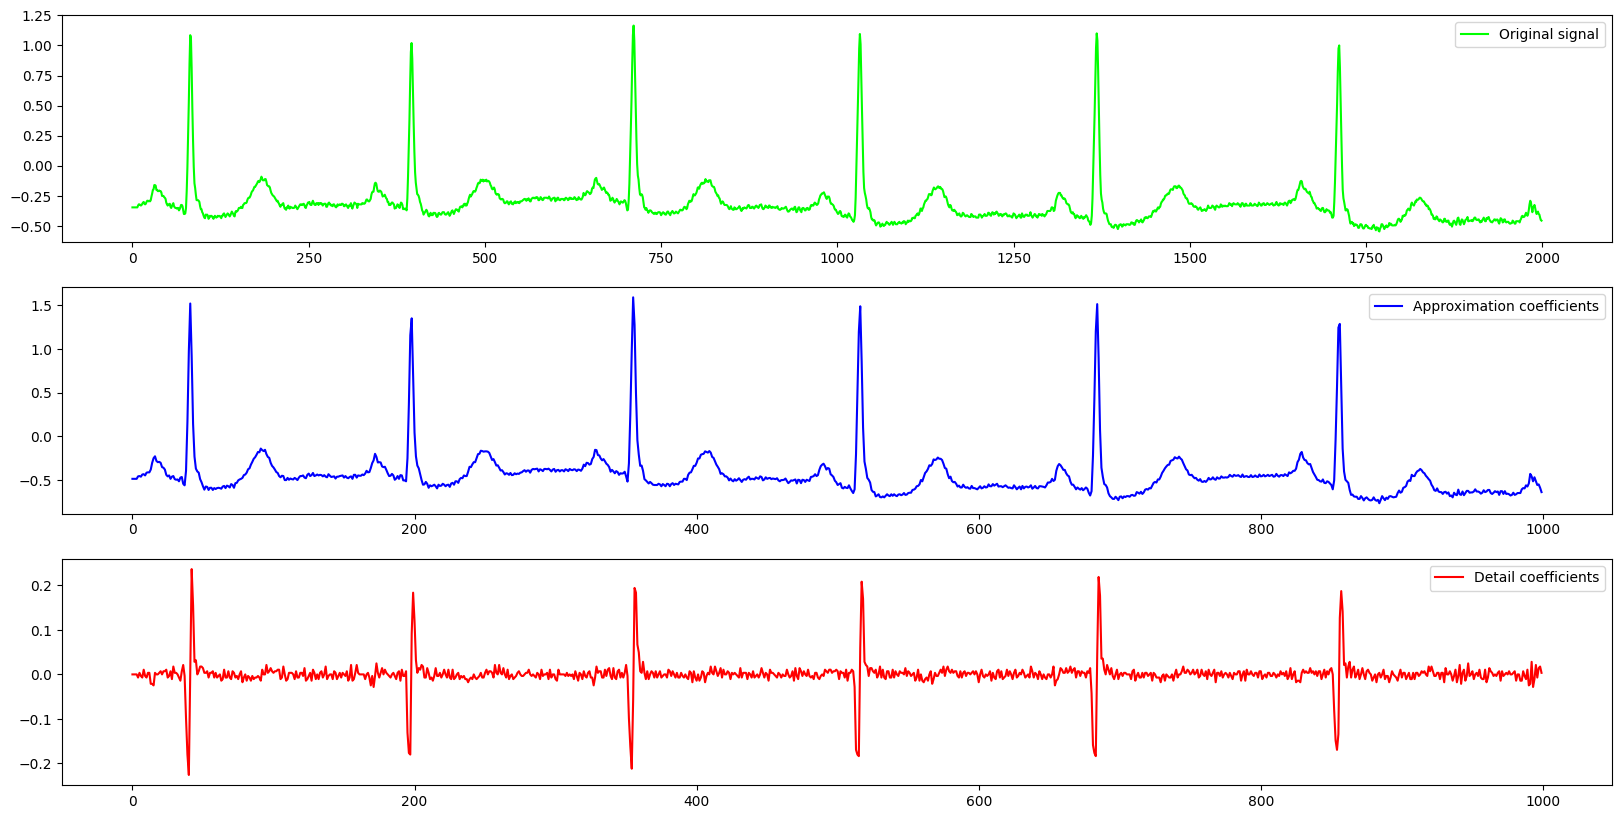

In [48]:
fig, ax = plt.subplots(3, figsize=(20,10))
ax[0].plot(signals, label="Original signal",color=(0,1,0))
ax[0].legend()
ax[1].plot(cA, label="Approximation coefficients",color=(0,0,1))
ax[1].legend()
ax[2].plot(cD, label="Detail coefficients",color=(1,0,0))
plt.legend()
plt.show()

## Solution 5.2

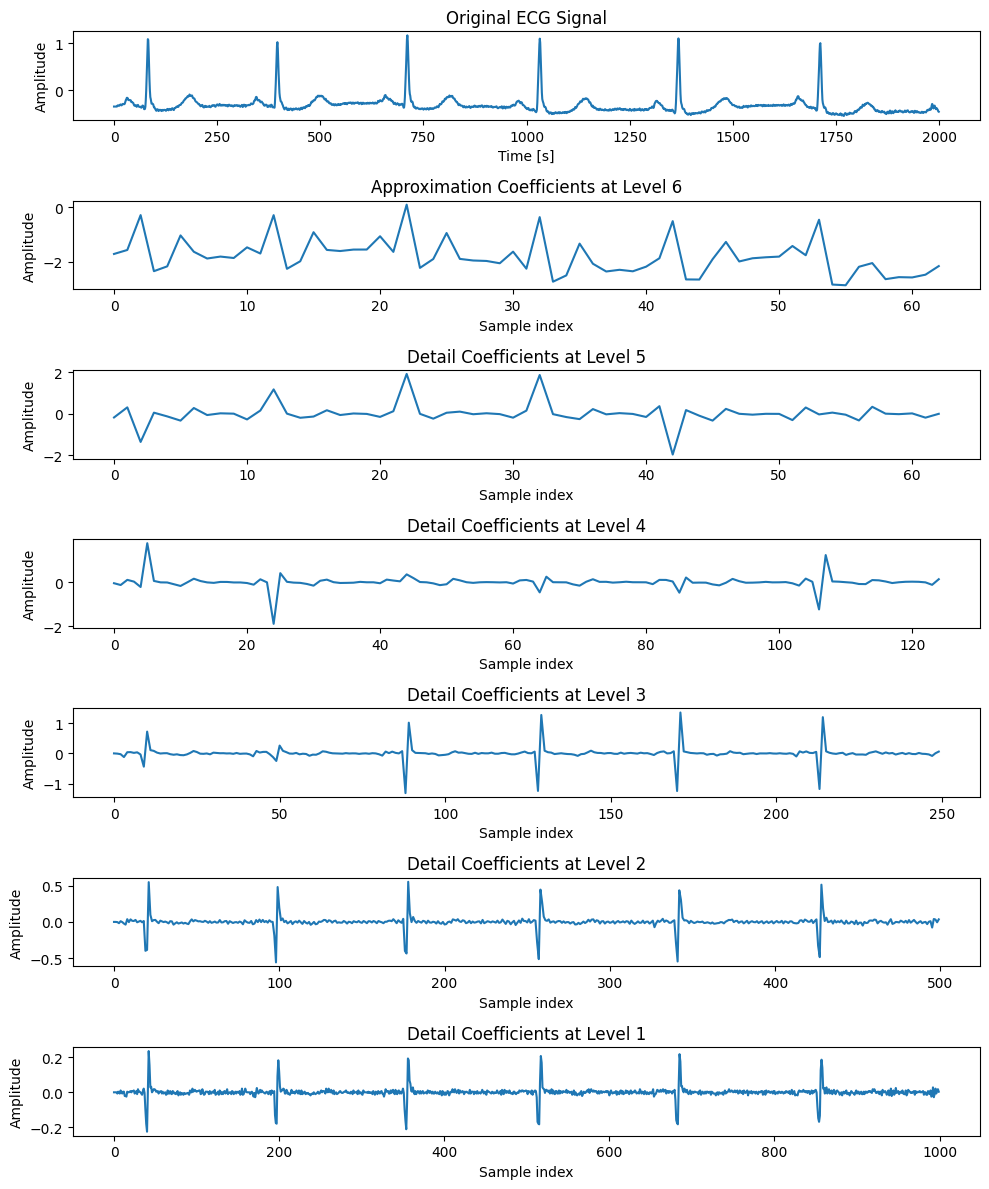

In [23]:
# multi-level Discrete Wavelet Transform up to level 5
coeffs = pywt.wavedec(signal_arr, 'haar', level=5)

# Create subplots
fig, axes = plt.subplots(len(coeffs) + 1, 1, figsize=(10, 12))

# Plot original ECG signal
axes[0].plot(signal_arr)
axes[0].set_title('Original ECG Signal')
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Amplitude')

# Plot approximation and detail coefficients
for i, coef in enumerate(coeffs):
    axes[i+1].plot(coef)
    if i == 0:
        axes[i+1].set_title(f'Approximation Coefficients at Level {len(coeffs)-i}')
    else:
        axes[i+1].set_title(f'Detail Coefficients at Level {len(coeffs)-i}')
    axes[i+1].set_xlabel('Sample index')
    axes[i+1].set_ylabel('Amplitude')

# Show plots
plt.tight_layout()
plt.show()

# EX6) Feature engineering for Time series

We will create some features for time series data.

6.1. Write a function named "calculate_statistics(x)" that returns the list of following features:

- 25th percentile value

- median value

- 75th percentile value

- min

- max

- mean

- standard deviation


6.2. Entropy values can be taken as a mesure of complexity of the signal. Write a function named "calculate_entropy(x)" that returns (Shannon) entropy of x


6.3. Zero crossing rate has been widely used in domain of speech recognition.
Create a function named "calculate_crossing(x)" that returns zero crossing rate of x.
Zero crossing rate is the number of times a signal crosses y = 0.


6.4. Write a function named "get_features(signal)" that combines the results of these functions.

6.5. Bonus : What is skewness and kurtosis ? Create a function to calculate both.

## Solution

In [24]:
def calculate_statistics(x):
    stats = []
    stats.append(np.percentile(x, 25))
    stats.append(np.percentile(x, 50))
    stats.append(np.percentile(x, 75))
    stats.append(np.min(x))
    stats.append(np.max(x))
    stats.append(np.mean(x))
    stats.append(np.std(x))
    return stats

In [25]:
# calculate the shannon entropy of x
# Shannon entropy measures the amount of information contained in a signal
def calculate_crossing_values(x):
    zero_crossing_indices = np.nonzero(np.diff(np.array(x) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(x) > np.mean(x)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return no_zero_crossings, no_mean_crossings

In [26]:
# Zero crossing rate is the number of times a signal crosses y = 0.

def calculate_entropy(x):
    # handle NaN values(Not a Number)
    x = x[~np.isnan(x)]
    # Calculer la distribution de probabilité des valeurs uniques dans x
    _, counts_elements = np.unique(x, return_counts=True)
    probabilities = counts_elements / counts_elements.sum()
    
    # Calculer l'entropie de Shannon
    entropy = -np.sum(probabilities * np.log2(probabilities))
    
    return entropy

In [27]:
# test the calculate_entropy function 

In [28]:
def get_features(x):
    features = []
    features.extend(calculate_statistics(x))
    features.extend(calculate_crossing_values(x))
    features.append(calculate_entropy(x))
    return features

### Test

In [29]:
list_test = [np.array([1,2,3,4,5,6,7,8, 9, 10]), np.array([1]), np.random.rand(5), np.random.normal(0, 1, 1000)]
for vector in list_test:
    stats = calculate_statistics(vector)
    print(stats)


[3.25, 5.5, 7.75, 1, 10, 5.5, 2.8722813232690143]
[1.0, 1.0, 1.0, 1, 1, 1.0, 0.0]
[0.030005727999579568, 0.08748809760154852, 0.4768001995488721, 0.023296212562236462, 0.6877978606539263, 0.2610776196732326, 0.2715488664654023]
[-0.6560854062193273, -0.0058534359878758225, 0.6781960851945432, -2.9087381318769134, 2.7418337034533575, 0.005392421098253138, 0.9671745332782425]


### Test
Generate a normal distribution to check standard deviation, skewness, kurtosis

In [30]:
#calculate_crossing_values(x)
input_tests = [np.array([1,2,-3,4, 0, 1]), np.random.normal(0, 1, 1000), np.random.uniform(0,1, 100)]
for input_test in input_tests:
    print(calculate_crossing_values(input_test))

(4, 4)
(480, 486)
(0, 43)


# Ex7) Extract features for ECG signals

DWT is used to decompose signal into its frequency bands. Now, you will calculate the features for each set of coeffs. These features will be used as input for a classifier.


Create a funciton named "get_features_for_signal(signal)" that do the following tasks:
1. Calculate the coeffs of your signal until levels 3.
2. Extract features for each of these coeffs

This function returns a list of features which combine all features from each coeff.

## Solution

In [31]:
# Calculate the coeffs of your signal until levels 3.
# Extract features for each of these coeffs

# This function returns a list of features which combine all features from each coeff.

def get_features_for_signal(signal):
    coeffs = pywt.wavedec(signal, 'haar', level=3)
    features = []
    for coeff in coeffs:
        features.extend(get_features(coeff))
    return features

In [32]:
# test the feature extraction on the signal
get_features_for_signal(signal_arr)

[-1.151258228119348,
 -0.9572458050312889,
 -0.7866562940700343,
 -1.4566399692442882,
 1.7766057877312011,
 -0.8938112556910437,
 0.4654287960580008,
 12,
 36,
 7.635666984610165,
 -0.0172357277914221,
 0.0008838834764831605,
 0.021213203435596337,
 -1.3116830791010459,
 1.3505739520663063,
 0.003196122650963206,
 0.2301619208296629,
 99,
 95,
 7.234814986975906,
 -0.01249999999999999,
 0.0,
 0.012500000000000011,
 -0.5574999999999999,
 0.5525,
 -0.0006099999999999982,
 0.08922193060004924,
 261,
 262,
 6.665078055389745,
 -0.00707106781186545,
 0.0,
 0.00707106781186545,
 -0.22627416997969518,
 0.23688077169749344,
 -0.00021920310216783003,
 0.03236165864105238,
 473,
 476,
 5.004106512714519]

# Ex8) Continuous Wavelet Transform (CWT) - Scaleogram

In this exercise, you will learn about Continuous Wavelet Transform. The CWT is used for spectral analysis of signal. The CWT returns two variables: the coefficients and the frequency. CWT coefficients in form of scalogram can be used to serve as image inputs to a deep network for signal classifications.


A signal from ARR Database is loaded in the environment and store in the variable "signal_arr".

1. Using pywt library, calculate the coefficients of the signal "signal_arr".

Do you have any comments on the coefficients ? What is the shape of the coefficients ?
Does it depend on the size of the variable "scales" that you choose?

The coeffs are complex or real ? Which wavelet function did you choose ?

2. Using plt.imshow(), display together the origine signal and the magnitude of the coefficients.


## Solution 8.1

In [33]:
# compute the signal coefficients using pywt.cwt

coeffs, freqs = pywt.cwt(signal_arr, np.arange(1, 128), 'gaus1')

# print the shape of coeffs
print(coeffs.shape)

(127, 2000)


The shape of the coefficients will depend on the number of scales we choose:

And the number of rows in the coefficients array will be equal to the number of scales.
The number of columns will be equal to the length of our input signal.

Choosing more scales will give us a finer "resolution" in the frequency domain but will also increase the computational cost and size of the coefficients array.

In our case, coefficients will have a shape of (len(scales), len(signal_arr)), or in this case, (127, 2000).

## Solution 8.2

In [1]:
import pandas as pd
import pywt

df = pd.read_csv('ecg.csv')
y = df['1']

# show the first 5 rows of the dataframe
df.head()

# drop the labels and the filename columns
df.drop(columns=['0', '1'], inplace=True, errors='ignore')

# convert 8th column to float
df['8'] = df['8'].astype(float)

# convert column 

,0,1,2,3,4,5,6,7,8,9,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,205,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,205,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,chf14,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,chf14,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,18184,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000


# Ex9) Train a classifier

The file 'ecg.csv' existed already in the environment. It was built of 81 records from the three PhysioNet databases. The data were truncated ( thanks to the function "cut_signal_into_segments"), resampled ( thanks to the fun "synchronize_signal") and passed into the function "get_features_of_signal" to get the features.

The goal of this exercise is to create a model to classify the signals.

1. Using panda, load the file 'ecg.csv' and store it in variable "df"

2. Label is located in which column? Store it in variable "y".

3. Normalise "df" avec un MinMaxScaler

4. Split "df" into df_train and df_test

5. Import a classifier then trainning the model.

6. Calculate the accuracy for df_test

# Ex10) Train a CNN model
There are some options to classify signals.
One is to use DWT and the features to classify ECG signals.  We have done it.
Another approach is to use CWT and CNN. To do so, you need:

1) Apply the CWT on the dataset

2) Transform the data to the right format

3) Create a CNN model (with Keras, Pytorch ....)

4) Train the model

5) Test the accuracy

And go!!!